In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
single_img = x_train[0]

In [7]:
single_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
single_img.shape

(28, 28)

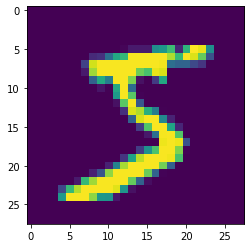

In [9]:
plt.imshow(single_img)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [14]:
y_example.shape

(60000, 10)

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [19]:
y_cat_train = to_categorical(y_train,10)

In [20]:
single_img.max()

255

In [21]:
single_img.min()

0

In [22]:
x_train = x_train/255

In [23]:
x_test = x_test/255

In [24]:
scaled_img = x_train[0]

In [25]:
scaled_img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

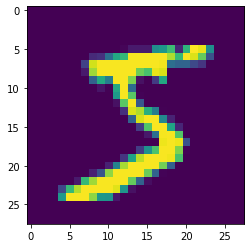

In [26]:
plt.imshow(scaled_img)

In [27]:
x_train.shape

(60000, 28, 28)

In [29]:
#batchsize,width,height,color_channels
x_train = x_train.reshape(60000,28,28,1)

In [30]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [32]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))#strides = 28/4
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

#OutPut Layer
#For multiclass actvfunc = softmax & total 10 outputs as(0....9)
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [35]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1465 - accuracy: 0.9566 - val_loss: 0.0551 - val_accuracy: 0.9826
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0446 - val_accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0417 - val_accuracy: 0.9857
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0220 - accuracy: 0.9932 - val_loss: 0.0391 - val_accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0460 - val_accuracy: 0.9865


In [36]:
metrics = pd.DataFrame(model.history.history)

In [37]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.146453,0.956567,0.055128,0.9826
1,0.049316,0.984750,0.044608,0.9843
2,0.032063,0.990067,0.041705,0.9857
3,0.022050,0.993217,0.039145,0.9886
4,0.016406,0.994533,0.046034,0.9865


<AxesSubplot:>

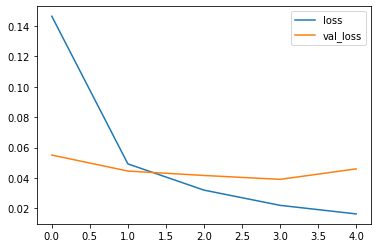

In [39]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

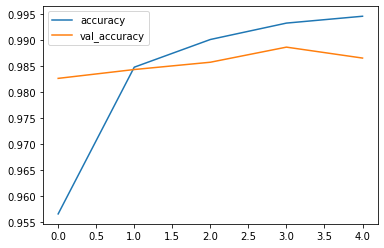

In [40]:
metrics[['accuracy','val_accuracy']].plot()

In [41]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.046033721417188644, 0.9865000247955322]

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 4ms/step


In [52]:
y_cat_test.shape

(10000, 10)

In [54]:
print(classification_report(y_cat_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



C:\Users\aarav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
my_number = x_test[0]

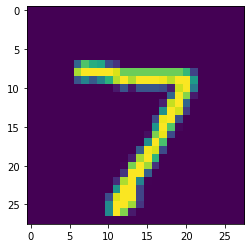

In [58]:
plt.imshow(my_number.reshape(28,28))

In [60]:
model.predict(my_number.reshape(1,28,28,1))

1/1 [==============================] - 0s 59ms/step


array([[5.1439478e-12, 1.8113934e-09, 1.4267802e-09, 8.3275635e-09,
        3.6019751e-12, 9.8421998e-13, 4.9791270e-16, 1.0000000e+00,
        1.0698596e-12, 8.1705248e-10]], dtype=float32)